## Machine Learning - Ex.3


In [1]:
%matplotlib inline
import math
import numpy as np
import matplotlib.pyplot as plt

### Part I - Linear classifier

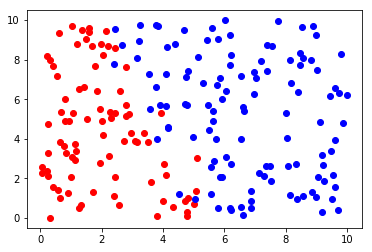

In [2]:
# generate the training data:

N = 200

x = np.random.random((N,2))*10

X = np.concatenate((np.ones((N,1)),x),axis=1);

w = np.array([-16,3,1])
z = np.dot(X,w)
h = 1/(1+np.exp(-z))
r = np.random.rand(N)
y = np.zeros(N)
y[r<h] = 1

plt.plot(x[y==0,0],x[y==0,1],'or')
plt.plot(x[y==1,0],x[y==1,1],'ob')
plt.show()



Implement a gradient descent algorithm to solve the logistic regression problem:


Next, use your algorithm to learn a linear classifier for the given data,

$$  y(x;w) =  \begin{cases}
        1, & g(w^\top x)\geq 0.5\\
       0, & g(w^\top x) < 0.5\\
        \end{cases} 
        $$
        
where, $w^\top x=w_0+w_1 x_1 + w_2 x_2$
        
and, $g(\cdot)$ is a sigmoid function:

$$ g(z)=\frac{1}{1+e^{-z}} $$

- Plot the original data points and mark (e.g., with yellow circles) any misclassified point.
- Draw the linear decision boundary ($w^\top x=0$).
- Try to plot the a colormap of the 2-D function $g(w^\top x)$ on the same plot.

[-22.21731861   4.08857631   1.37369033]


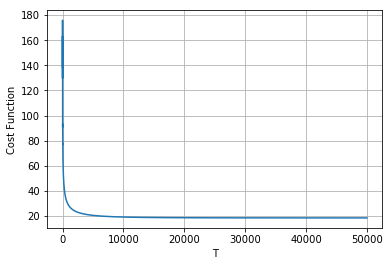

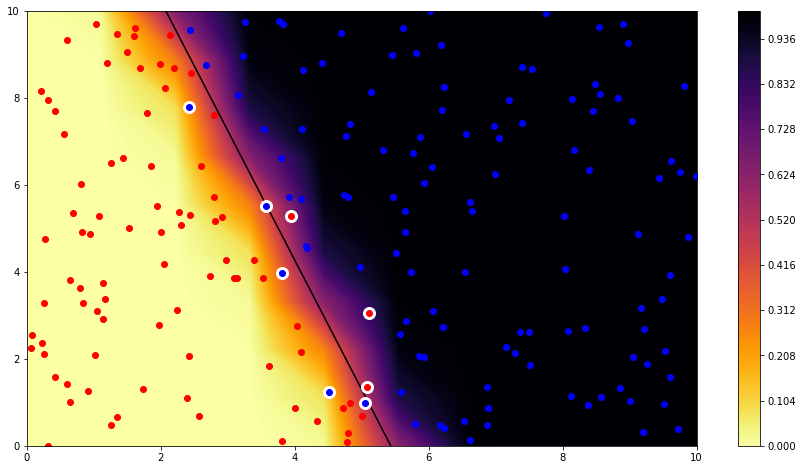

In [3]:
# your code here..
def decisionBoundary(cords,w):
    return w[0] + w[1]*cords[0] + w[2]*cords[1]
def sigmoid(z):
    return 1/(1+np.exp(-z))
def g(x,w):
    return sigmoid(np.dot(x,w))
def classfier(x,w):
    if(g(x,w) >= 0.5):
        return 1
    return 0
def J_cost(X,y,w):
    #z = X.dot(w)
    h = g(X,w)#1/(1+np.exp(-z))
    temp = -1*(1-y)*np.log(1-h)-y*np.log(h)
    return np.mean(np.sum(temp))
def gradient_descent(X, y, alpha=0.01, T=100):
    J = np.zeros(T) # to hold the cost function value J at each iteration
    N,d = X.shape
    w = np.zeros(d)
    X_TRANS = X.T
    R = X_TRANS.dot(y)
    for i in range(T):
        J[i] = J_cost(X,y,w)
        #z = X.dot(w)
        #h = 1/(1+np.exp(-z))
        #temp = h.dot(X)
        temp = g(X,w).dot(X)
        w = w -alpha*((temp-R)/N)
    return w, J
T = 50000
wResult,Jcost = gradient_descent(X,y,0.3,T)
print(wResult)
space = np.linspace(1,T,T)
plt.plot(space,Jcost)
plt.xlabel('T')
plt.ylabel('Cost Function')
plt.grid()
plt.show()
plt.figure(figsize=(15,8))
y_linearClassfied = np.zeros(N)
for i in range(N):
    y_linearClassfied[i] = classfier(X[i],wResult)
plt.plot(x[y != y_linearClassfied,0],x[y != y_linearClassfied,1],'ow',markersize=12)
plt.plot(x[y==0,0],x[y==0,1],'or',markersize=6)
plt.plot(x[y==1,0],x[y==1,1],'ob',markersize=6)
xspace = np.linspace(0,10,10)
yspace = np.linspace(0,10,10)
xx1, xx2 = np.meshgrid(xspace,yspace)
cp = plt.contourf(xx1, xx2, sigmoid(decisionBoundary((xx1,xx2),wResult)),255, cmap="inferno_r")
plt.colorbar(cp)
plt.contour(xx1, xx2, decisionBoundary((xx1,xx2),wResult),0,colors='black',linewidth=.5)
plt.show()

### Part II - Non-linear classifier

In this part you are given sample points in 2-D, which are not linearly seperable. 

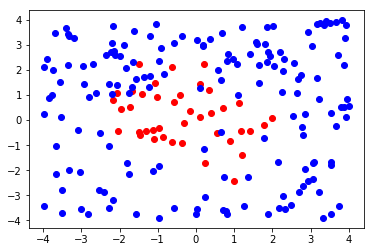

In [4]:
N= 200

x = np.random.random((N,2))*8-4

X = np.concatenate((np.ones((N,1)),x,x**2),axis=1);
w = np.array([-4,0,0,1,1])
z = np.dot(X,w)
h = 1/(1+np.exp(-z))
r = np.random.rand(N)
y = np.zeros(N)
y[r<h] = 1



plt.plot(x[y==0,0],x[y==0,1],'or')
plt.plot(x[y==1,0],x[y==1,1],'ob')
plt.show()



Use the same algoirthm from part I, to find a non-linear classifier:

$$  y(x;w) =  \begin{cases}
        1, & g(w^\top x)\geq 0.5\\
       0, & g(w^\top x) < 0.5\\
        \end{cases} 
        $$
        
where, $w^\top x=w_0+w_1 x_1 + w_2 x_2 + w_3 {x_1}^2 + w_4 {x_2}^2$
        
and, $g(\cdot)$ is a sigmoid function:

$$ g(z)=\frac{1}{1+e^{-z}} $$

- Plot the original data points and mark (e.g., with yellow circles) any misclassified point.
- Draw the linear decision boundary ($w^\top x=0$).
- Try to plot the a colormap of the 2-D function $g(w^\top x)$ on the same plot.

[-2.98373817  0.26766225  0.14571394  0.72768545  0.80802595]


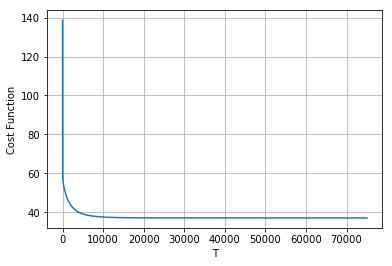

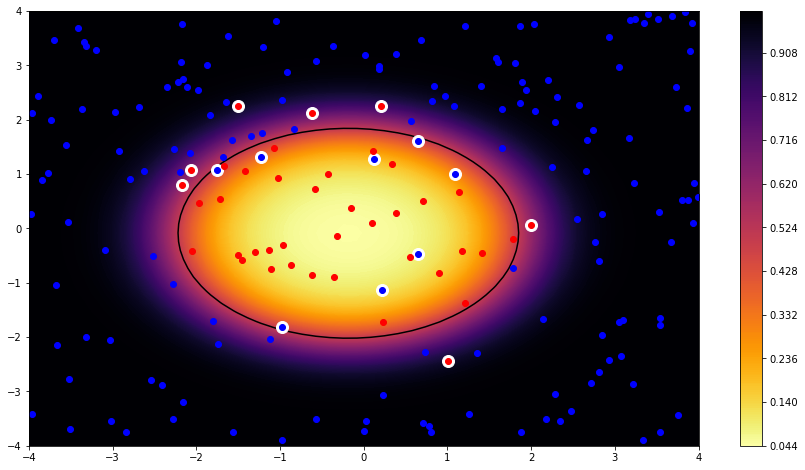

In [5]:
# your code here..
def decisionBoundary(cords,w):
    return w[0] + w[1]*cords[0] + w[2]*cords[1] + w[3]*cords[0]**2 + w[4]*cords[1]**2

T = 75000
wResult,Jcost = gradient_descent(X,y,0.01,T)
print(wResult)
space = np.linspace(1,T,T)
plt.plot(space,Jcost)
plt.xlabel('T')
plt.ylabel('Cost Function')
plt.grid()
plt.show()
plt.figure(figsize=(15,8))
y_classified = np.zeros(N)
for i in range(N):
    y_classified[i] = classfier(X[i],wResult)
plt.plot(x[y != y_classified,0],x[y != y_classified,1],'ow',markersize=12)
plt.plot(x[y==0,0],x[y==0,1],'or',markersize=6)
plt.plot(x[y==1,0],x[y==1,1],'ob',markersize=6)
xspace = np.linspace(-4,4,50)
yspace = np.linspace(-4,4,50)
xx1, xx2 = np.meshgrid(xspace,yspace)
cp = plt.contourf(xx1, xx2, sigmoid(decisionBoundary((xx1,xx2),wResult)),255, cmap="inferno_r")
plt.colorbar(cp)
plt.contour(xx1, xx2, decisionBoundary((xx1,xx2),wResult),0,colors='black',linewidth=.5)
plt.show()


## Good luck !